In [2]:
import sqlite3
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
vSqlConnection = sqlite3.connect('resources/coink.db')
vData = pd.read_sql('SELECT * FROM TB_JOB_SATISFACTION', vSqlConnection)
vData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

C:\Users\Johan\AppData\Local\Temp\ipykernel_10692\207237478.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  vCorrelationMatrix = vData.corr()


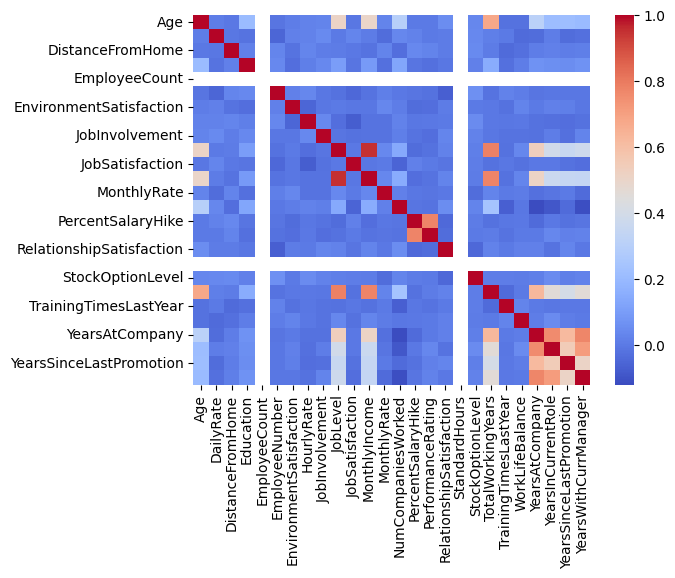

In [4]:
vCorrelationMatrix = vData.corr()
sn.heatmap(vCorrelationMatrix, annot=False, cmap="coolwarm")
plt.show()

In [5]:
# Se obtiene las correlaciones más fuertes en el DataSet.
vCorrelationMatrix[vCorrelationMatrix < 1][vCorrelationMatrix > 0.5].unstack() \
    .transpose().drop_duplicates().dropna().sort_values(ascending=False)

JobLevel                 MonthlyIncome              0.950300
                         TotalWorkingYears          0.782208
PercentSalaryHike        PerformanceRating          0.773550
MonthlyIncome            TotalWorkingYears          0.772893
YearsAtCompany           YearsWithCurrManager       0.769212
                         YearsInCurrentRole         0.758754
YearsInCurrentRole       YearsWithCurrManager       0.714365
Age                      TotalWorkingYears          0.680381
TotalWorkingYears        YearsAtCompany             0.628133
YearsAtCompany           YearsSinceLastPromotion    0.618409
YearsInCurrentRole       YearsSinceLastPromotion    0.548056
JobLevel                 YearsAtCompany             0.534739
MonthlyIncome            YearsAtCompany             0.514285
YearsSinceLastPromotion  YearsWithCurrManager       0.510224
Age                      JobLevel                   0.509604
dtype: float64

In [6]:
from pandas_profiling import ProfileReport

vProfile = ProfileReport(vData, title = "Job Satisfaction - Report")
vProfile.to_file("resources/job_satisfaction_auto_eda.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 32.27it/s]
